# WEEK 2 - Data Preprocessing

In [1]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
user_data = pd.read_csv("UserData (2).csv")
opportunity_data = pd.read_csv("Opportunity Wise Data.csv")

In [3]:
user_data.head(2)

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False


In [4]:
opportunity_data.head(2)

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Male,Dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,"Oct 03, 2022, 17:29:17","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Female,Amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,"Jan 05, 2023, 18:58:37","Jan 05, 2023, 18:52:39",200.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."


### Analyze Data Summary

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreferredSponsors  27562 non-null  object
 1   Gender             18027 non-null  object
 2   Country            27500 non-null  object
 3   Degree             16750 non-null  object
 4   Sign Up Date       27562 non-null  object
 5   city               18028 non-null  object
 6   zip                18018 non-null  object
 7   isFromSocialMedia  27553 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [6]:
opportunity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20322 entries, 0 to 20321
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Profile Id                20322 non-null  object 
 1   Opportunity Id            20322 non-null  object 
 2   Opportunity Name          20322 non-null  object 
 3   Opportunity Category      20322 non-null  object 
 4   Opportunity End Date      20322 non-null  object 
 5   Gender                    20321 non-null  object 
 6   City                      20321 non-null  object 
 7   State                     20308 non-null  object 
 8   Country                   20322 non-null  object 
 9   Zip Code                  20309 non-null  object 
 10  Graduation Date(YYYY MM)  20321 non-null  object 
 11  Current Student Status    20321 non-null  object 
 12  Current/Intended Major    20278 non-null  object 
 13  Status Description        20322 non-null  object 
 14  Apply 

In [7]:
# Checking for missing values
user_data.isnull().sum()

PreferredSponsors        0
Gender                9535
Country                 62
Degree               10812
Sign Up Date             0
city                  9534
zip                   9544
isFromSocialMedia        9
dtype: int64

In [8]:
opportunity_data.isnull().sum()

Profile Id                      0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
Gender                          1
City                            1
State                          14
Country                         0
Zip Code                       13
Graduation Date(YYYY MM)        1
Current Student Status          1
Current/Intended Major         44
Status Description              0
Apply Date                      0
Opportunity Start Date        804
Reward Amount               17801
Badge Id                    17801
Badge Name                  17801
Skill Points Earned         17801
Skills Earned               17801
dtype: int64

### Handle Outliers and Anomalies

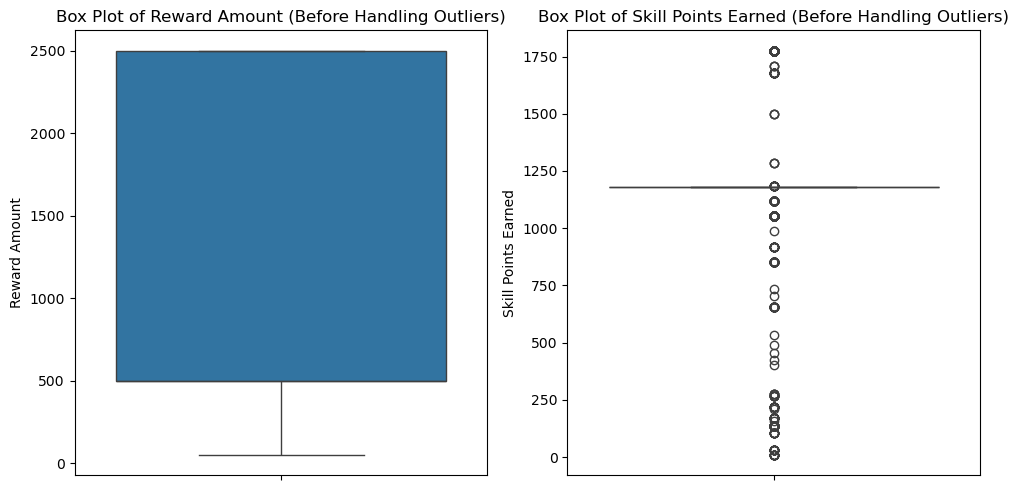

In [9]:
# Assuming 'Reward Amount' and 'Skill Points Earned' are the relevant numerical columns
numerical_cols = ['Reward Amount', 'Skill Points Earned']

# Plot box plots for numerical columns before handling outliers
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=opportunity_data[col])
    plt.title(f'Box Plot of {col} (Before Handling Outliers)')
plt.tight_layout()
plt.show()

In [10]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply IQR method to numerical columns in opportunity data
for col in ['Reward Amount', 'Skill Points Earned']:  # Add more numerical columns as needed
    opportunity_data = remove_outliers_iqr(opportunity_data, col)
    
# Apply IQR method to numerical columns
#opportunity_data_no_outliers = opportunity_data.copy()
#for col in numerical_cols:
    #opportunity_data_no_outliers = remove_outliers_iqr(opportunity_data_no_outliers, col)


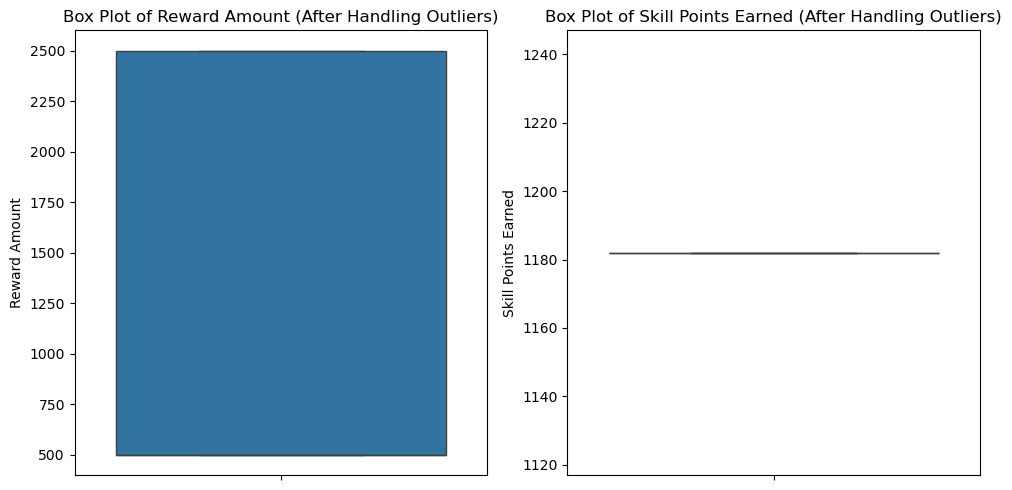

In [11]:
# Plot box plots for numerical columns after handling outliers
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=opportunity_data[col])
    plt.title(f'Box Plot of {col} (After Handling Outliers)')
plt.tight_layout()
plt.show()

In [12]:
#maximum skills points earned
opportunity_data['Skill Points Earned'].max()

1182.0

In [13]:
opportunity_data['Skill Points Earned'].describe()

count    1519.0
mean     1182.0
std         0.0
min      1182.0
25%      1182.0
50%      1182.0
75%      1182.0
max      1182.0
Name: Skill Points Earned, dtype: float64

In [14]:
#maximum reward amount earned
opportunity_data['Reward Amount'].max()

2500.0

In [15]:
opportunity_data['Reward Amount'].describe()

count    1519.00000
mean     1429.55892
std       997.84445
min       500.00000
25%       500.00000
50%       500.00000
75%      2500.00000
max      2500.00000
Name: Reward Amount, dtype: float64

In [16]:
top_10 = opportunity_data.sort_values(by='Skill Points Earned', ascending=False).head(10)

print("Top 10 List of Names with Details:")
print(top_10[['Badge Name', 'Skill Points Earned']])

Top 10 List of Names with Details:
                                            Badge Name  Skill Points Earned
1378                                 Digital Marketing               1182.0
11232  Data Visualization Virtual Internship Completed               1182.0
11320  Data Visualization Virtual Internship Completed               1182.0
11309                               Data Visualization               1182.0
11281  Data Visualization Virtual Internship Completed               1182.0
11276                               Data Visualization               1182.0
11253  Data Visualization Virtual Internship Completed               1182.0
11241  Data Visualization Virtual Internship Completed               1182.0
11236  Data Visualization Virtual Internship Completed               1182.0
11235  Data Visualization Virtual Internship Completed               1182.0


### Normalize or Scale Relevant Features

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features in opportunity data
numerical_cols_opportunity = ['Reward Amount', 'Skill Points Earned']  # Add more numerical columns as needed
scaler_opportunity = MinMaxScaler()
opportunity_data[numerical_cols_opportunity] = scaler_opportunity.fit_transform(opportunity_data[numerical_cols_opportunity])

### Addressing Data Quality Issues

In [18]:
# Handle missing data in user_data
user_data.fillna({'current_intended_major': 'Unknown', 'city': 'Unknown'}, inplace=True)

# Ensure consistency in categorical variables
user_data['Gender'] = user_data['Gender'].str.lower().replace({'male': 'M', 'female': 'F'})


In [19]:
# Handle missing data in opportunity_data
opportunity_data.fillna({'Reward Amount': 0, 'Badge Name': 'Unknown'}, inplace=True)

# Ensure consistency in categorical variables
opportunity_data['Opportunity Category'] = opportunity_data['Opportunity Category'].str.lower()

# Convert Apply Date and Opportunity End Date to datetime
opportunity_data['Apply Date'] = pd.to_datetime(opportunity_data['Apply Date'], errors='coerce')
opportunity_data['Opportunity End Date'] = pd.to_datetime(opportunity_data['Opportunity End Date'], errors='coerce')

# Drop rows with invalid dates
opportunity_data.dropna(subset=['Apply Date'], inplace=True)

In [20]:
# Converting date columns to datetime format
#date_columns = ['Opportunity End Date', 'Apply Date', 'Opportunity Start Date', 'Graduation Date(YYYY MM)']
date_columns = ['Opportunity Start Date', 'Graduation Date(YYYY MM)']
for col in date_columns:
    opportunity_data[col] = pd.to_datetime(opportunity_data[col], errors='coerce')

In [21]:
# removing the duplicate rows if they are present
user_data = user_data.drop_duplicates()
opportunity_data = opportunity_data.drop_duplicates()

In [22]:
user_data.dropna(inplace=True)
opportunity_data.dropna(inplace=True)

### Feature Engineering and Data Transformation

In [23]:
# Create new features if needed (e.g., length of time active on the platform)
user_data['Sign Up Date'] = pd.to_datetime(user_data['Sign Up Date'], errors='coerce')
user_data.dropna(subset=['Sign Up Date'], inplace=True)

# Extract year and month
user_data['signup_year'] = user_data['Sign Up Date'].dt.year
user_data['signup_month'] = user_data['Sign Up Date'].dt.to_period('M')

C:\Users\97152\AppData\Local\Temp\ipykernel_24456\2319276070.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_data['signup_month'] = user_data['Sign Up Date'].dt.to_period('M')


In [24]:
# Transform categorical variables into numerical format
# One-hot encode categorical variables
user_data = pd.get_dummies(user_data, columns=['Gender', 'Country', 'isFromSocialMedia'], drop_first=True)

opportunity_data = pd.get_dummies(opportunity_data, columns=['Country','Opportunity Category','Status Description'], drop_first=True)

In [25]:
print("User Data missing values:\n", user_data.isnull().sum())

User Data missing values:
 PreferredSponsors               0
Degree                          0
Sign Up Date                    0
city                            0
zip                             0
                               ..
Country_Virgin Islands, U.S.    0
Country_Yemen                   0
Country_Zambia                  0
Country_Zimbabwe                0
isFromSocialMedia_True          0
Length: 139, dtype: int64


In [26]:
print("Opportunity Data missing values:\n", opportunity_data.isnull().sum())

Opportunity Data missing values:
 Profile Id                  0
Opportunity Id              0
Opportunity Name            0
Opportunity End Date        0
Gender                      0
City                        0
State                       0
Zip Code                    0
Graduation Date(YYYY MM)    0
Current Student Status      0
Current/Intended Major      0
Apply Date                  0
Opportunity Start Date      0
Reward Amount               0
Badge Id                    0
Badge Name                  0
Skill Points Earned         0
Skills Earned               0
Country_Ghana               0
Country_India               0
Country_Nigeria             0
Country_Pakistan            0
Country_Ukraine             0
Country_United Kingdom      0
Country_United States       0
Country_Vietnam             0
Country_Zambia              0
dtype: int64


## Trend and Comparative Analysis

Let's ensure that the trend and comparative analysis is visualized correctly.

### Visualize Monthly and Yearly Trends in User Sign-ups

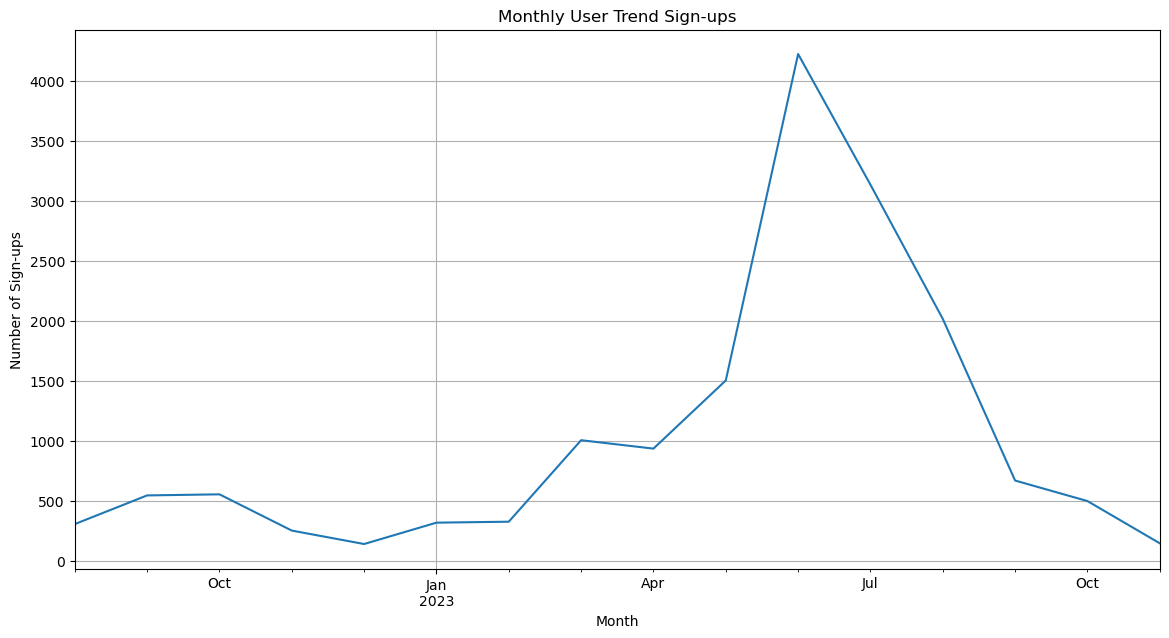

In [27]:
import matplotlib.pyplot as plt

# Monthly trend
monthly_signups = user_data['signup_month'].value_counts().sort_index()
monthly_signups.plot(kind='line', figsize=(14, 7))
plt.title('Monthly User Trend Sign-ups')
plt.xlabel('Month')
plt.ylabel('Number of Sign-ups')
plt.grid(True)
plt.show()

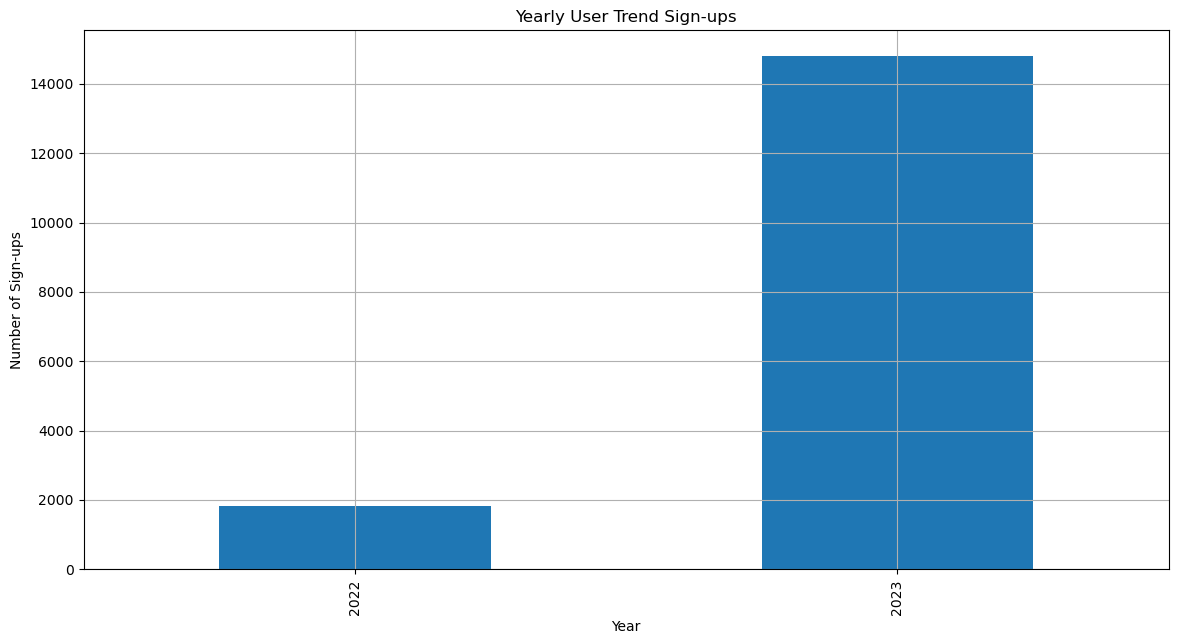

In [28]:
# Yearly trend
yearly_signups = user_data['signup_year'].value_counts().sort_index()
yearly_signups.plot(kind='bar', figsize=(14, 7))
plt.title('Yearly User Trend Sign-ups')
plt.xlabel('Year')
plt.ylabel('Number of Sign-ups')
plt.grid(True)
plt.show()

## Demographic Shifts

Analyze Trends in User Demographics Over Time

C:\Users\97152\AppData\Local\Temp\ipykernel_24456\635545756.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_data['signup_month'] = user_data['Sign Up Date'].dt.to_period('M')


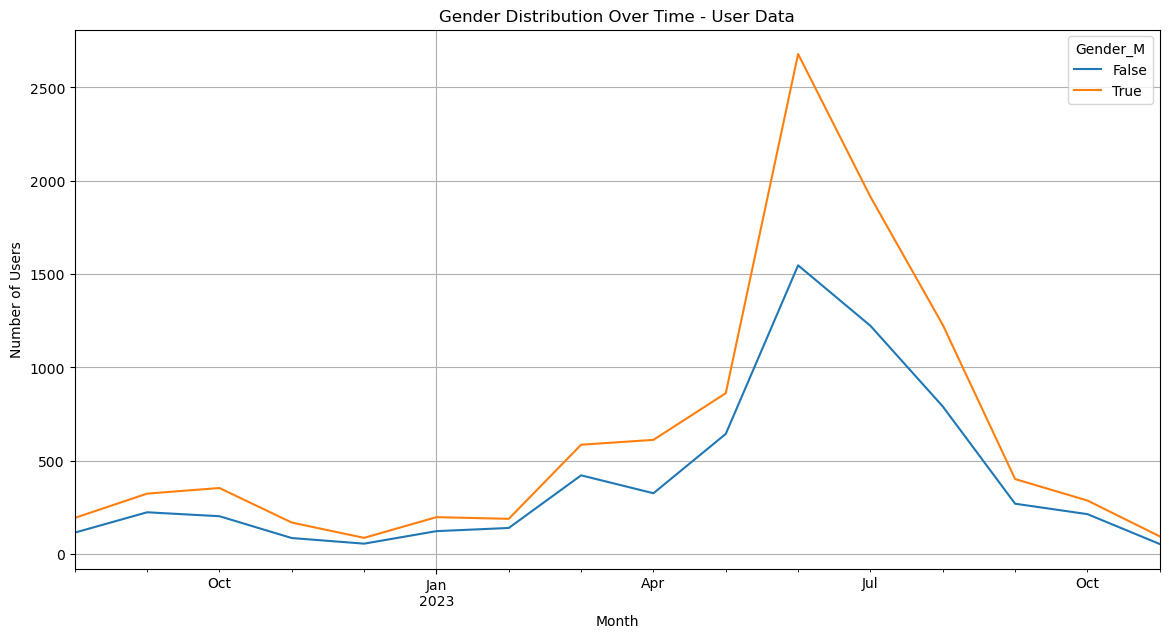

In [29]:
# Extract gender, student status, and major distribution over time
user_data['signup_month'] = user_data['Sign Up Date'].dt.to_period('M')

# Gender distribution over time
gender_trends = user_data.groupby(['signup_month', 'Gender_M']).size().unstack().fillna(0)
gender_trends.plot(kind='line', figsize=(14, 7))
plt.title('Gender Distribution Over Time - User Data')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

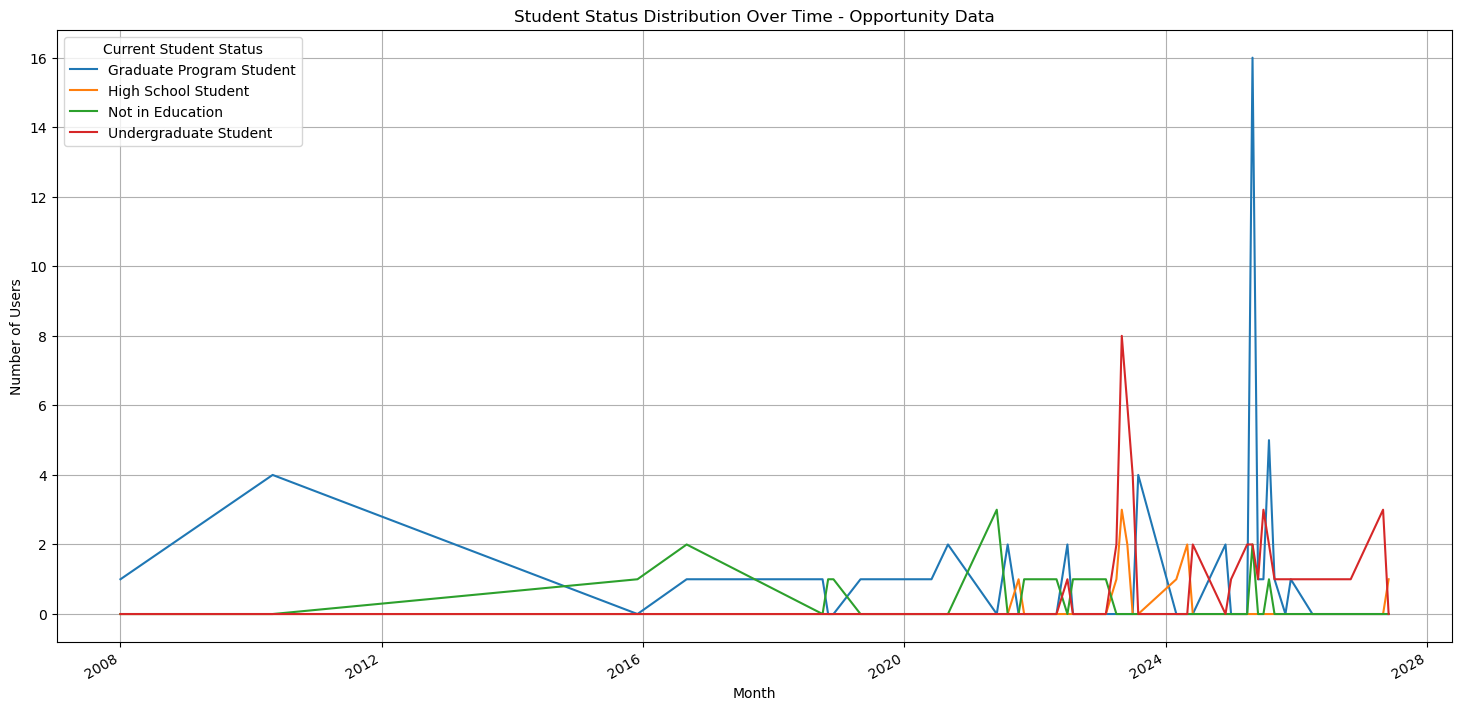

In [30]:
# Student status distribution over time
student_status_trends = opportunity_data.groupby(['Graduation Date(YYYY MM)', 'Current Student Status']).size().unstack().fillna(0)
student_status_trends.plot(kind='line', figsize=(18, 9))
plt.title('Student Status Distribution Over Time - Opportunity Data')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

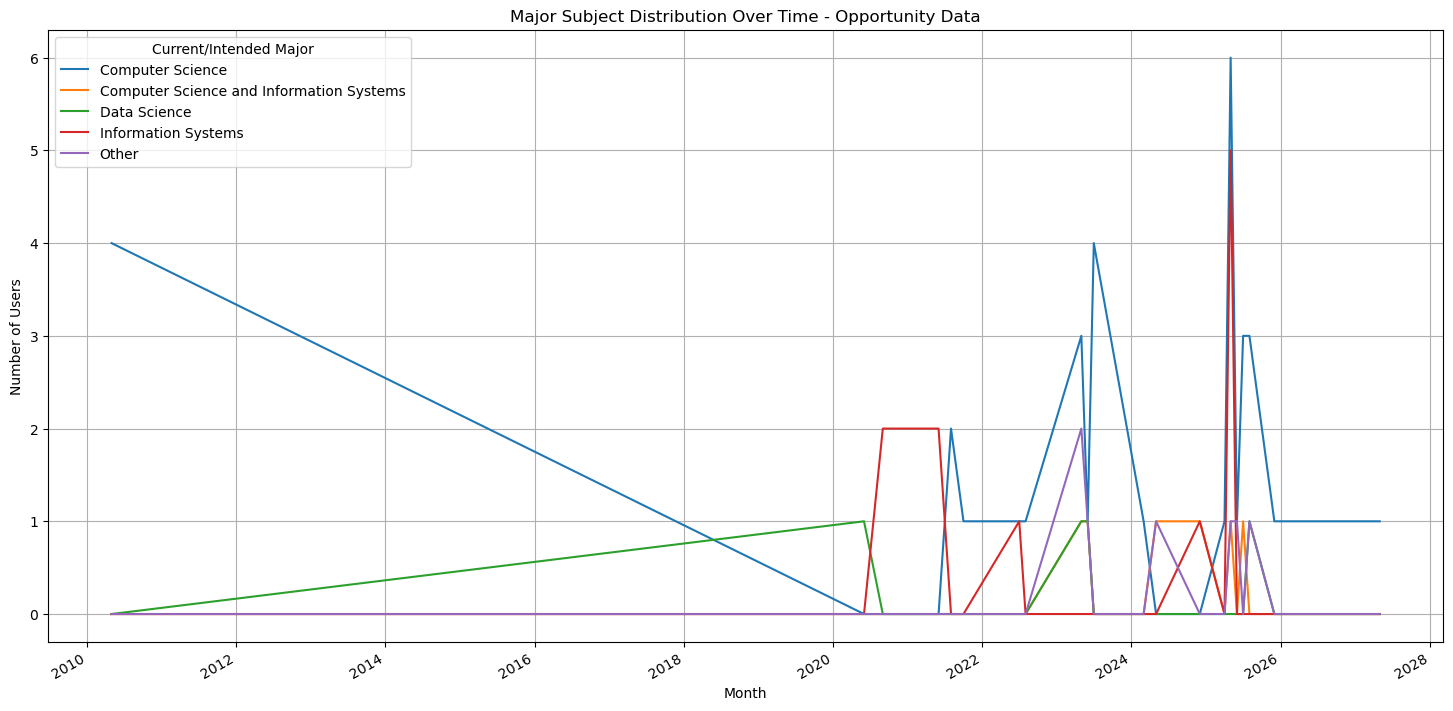

In [31]:
# Major distribution over time (show top 5 majors for readability)
top_majors = opportunity_data['Current/Intended Major'].value_counts().head(5).index
major_trends = opportunity_data[opportunity_data['Current/Intended Major'].isin(top_majors)].groupby(['Graduation Date(YYYY MM)', 'Current/Intended Major']).size().unstack().fillna(0)
major_trends.plot(kind='line', figsize=(18, 9))
plt.title('Major Subject Distribution Over Time - Opportunity Data')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


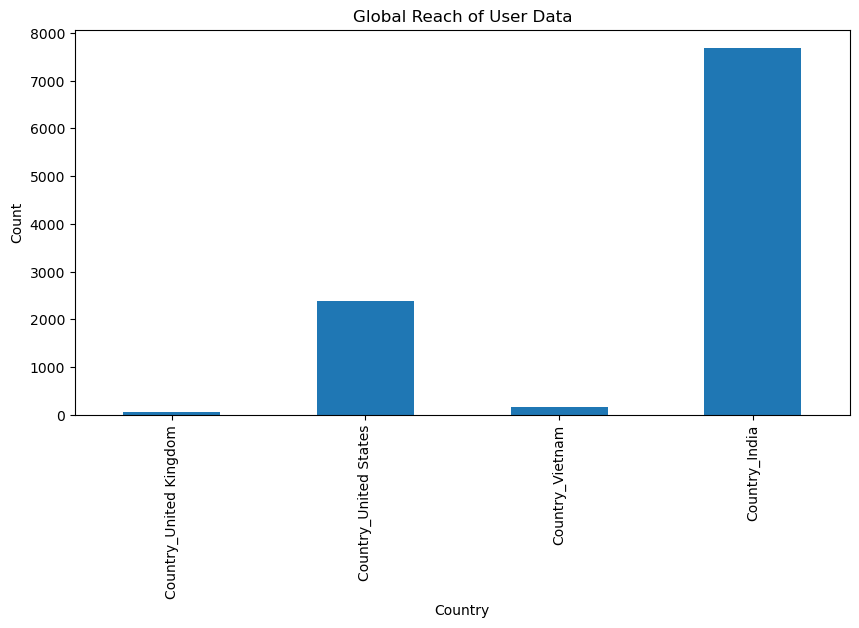

In [32]:
# Plot country distribution
country_counts = user_data[['Country_United Kingdom', 'Country_United States','Country_Vietnam','Country_India']].sum()
country_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Global Reach of User Data')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3],labels=['Country_United Kingdom', 'Country_United States', 'Country_Vietnam', 'Country_India'])
plt.show()


## Top 10 US CITY INSIGHTS

In [33]:
variations = ['saint Louis', 'ST LOUIS','Saint louis','saint louis','SaintLouis']
user_data['city'] = user_data['city'].replace(variations, 'Saint Louis')

In [34]:
# Filter data for US cities
us_cities = user_data[user_data['Country_United States'] == 1]


# Plot city distribution
city_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 US City Insight-User Signup')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

NameError: name 'city_counts' is not defined

In [ ]:
variations = ['saint Louis', 'ST LOUIS','Saint louis','saint louis','SaintLouis']
opportunity_data['City'] = opportunity_data['City'].replace(variations, 'Saint Louis')

In [ ]:
# Filter data for US cities
us_cities = opportunity_data[opportunity_data['Country_United States'] == 1]

# Plot city distribution
city_counts = us_cities['City'].value_counts().head(10)  # Display top 10 cities for readability
city_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 US City Insights-Opportunity Wise Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Comparative analysis: popularity of opportunities

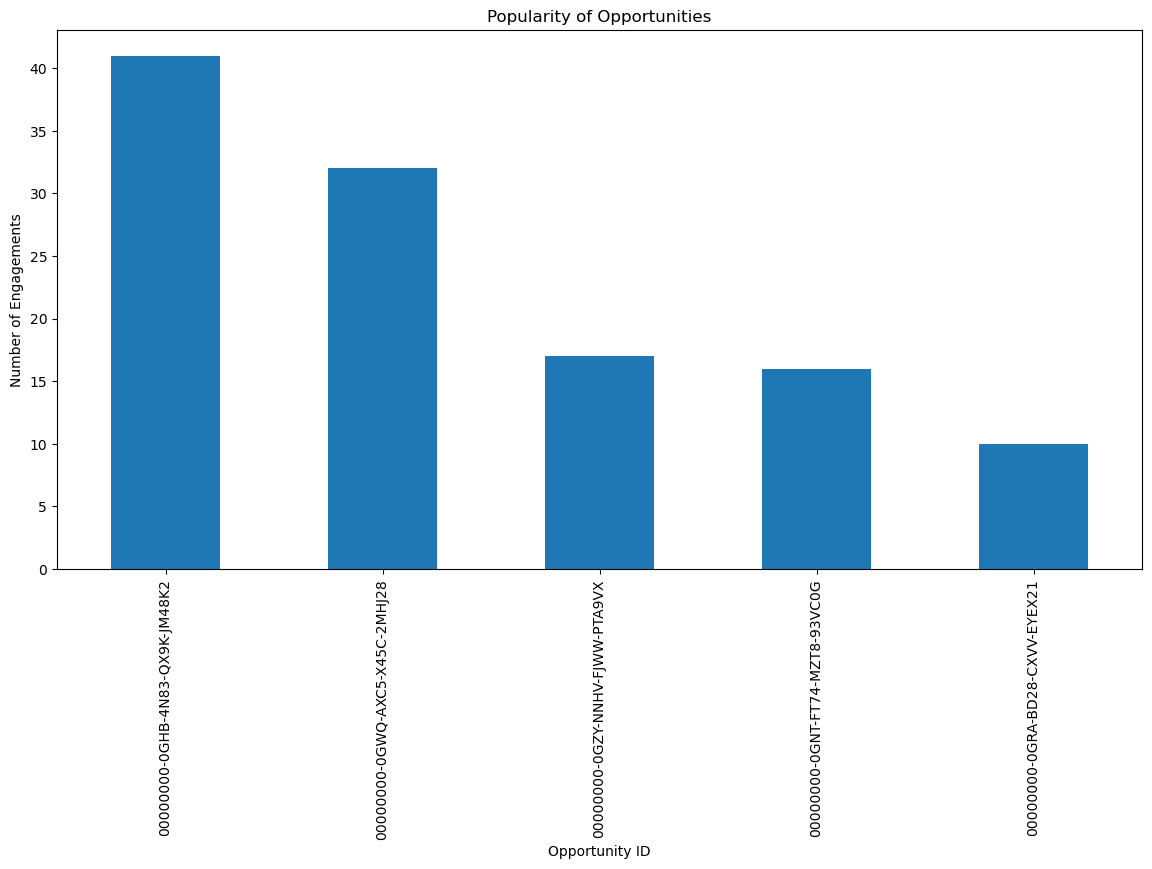

In [35]:
opportunity_popularity = opportunity_data['Opportunity Id'].value_counts()
opportunity_popularity.plot(kind='bar', figsize=(14, 7))
plt.title('Popularity of Opportunities')
plt.xlabel('Opportunity ID')
plt.ylabel('Number of Engagements')
plt.show()


### Gender Distribution

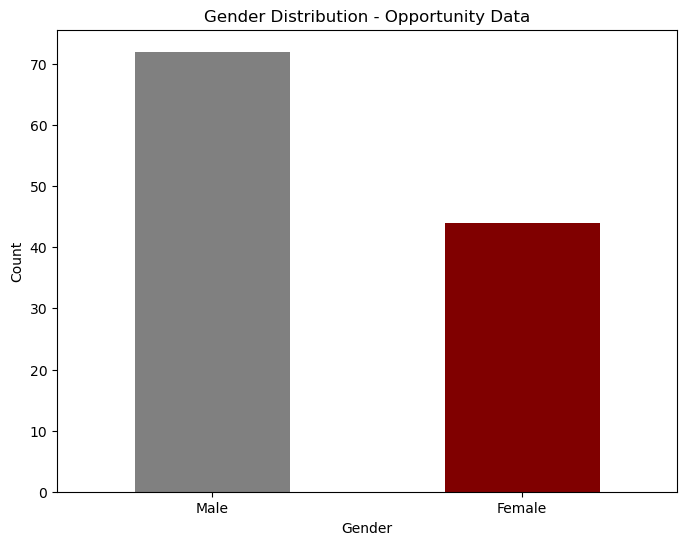

In [36]:
plt.figure(figsize=(8, 6))
gender_count=opportunity_data['Gender'].value_counts()
gender_count.plot(kind='bar', color=['gray', 'maroon', 'green', 'red'])
plt.title('Gender Distribution - Opportunity Data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Opportunity Name Insights

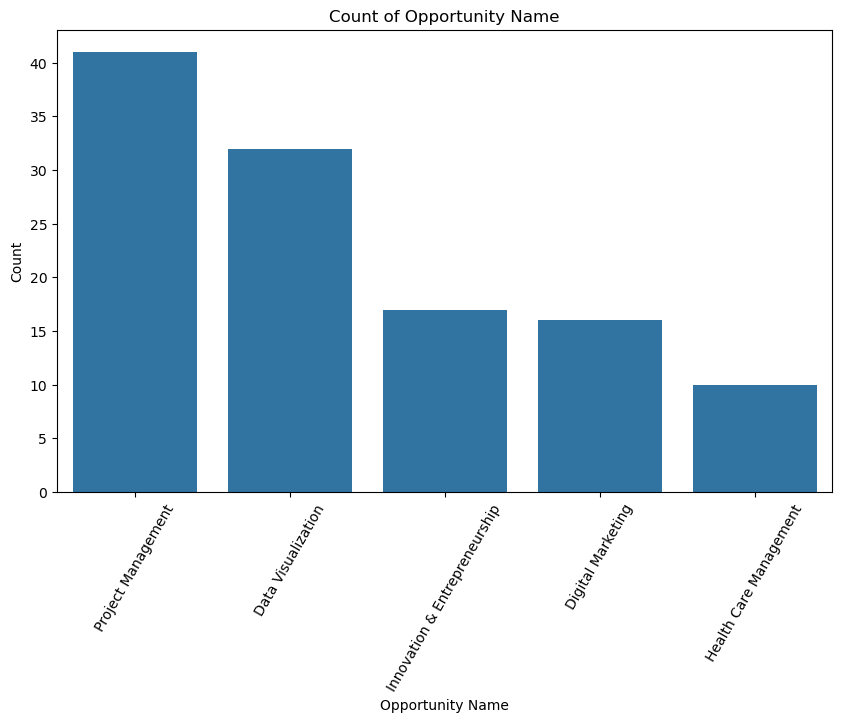

In [37]:
#opportunity distribution
plt.figure(figsize=(10, 6))
sns.countplot(opportunity_data, x='Opportunity Name', order=opportunity_data['Opportunity Name'].value_counts().index)
plt.title('Count of Opportunity Name')
plt.xlabel('Opportunity Name')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

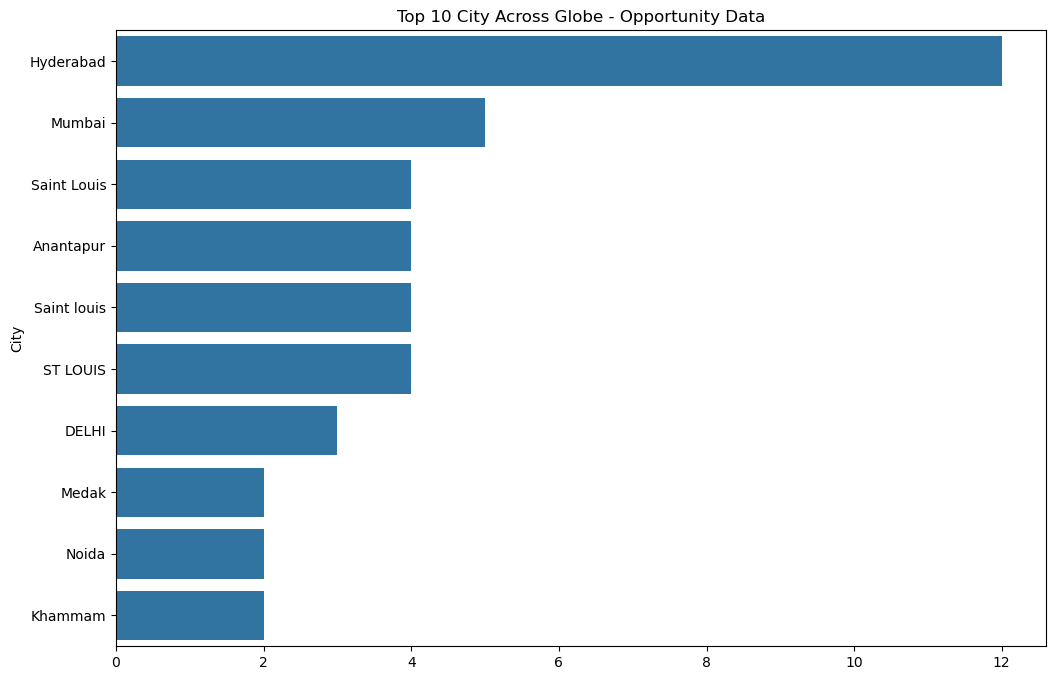

In [38]:
# City Distribution (Top 10 Cities)
plt.figure(figsize=(12, 8))
top_cities = opportunity_data['City'].value_counts().nlargest(10)
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title('Top 10 City Across Globe - Opportunity Data')
plt.show()

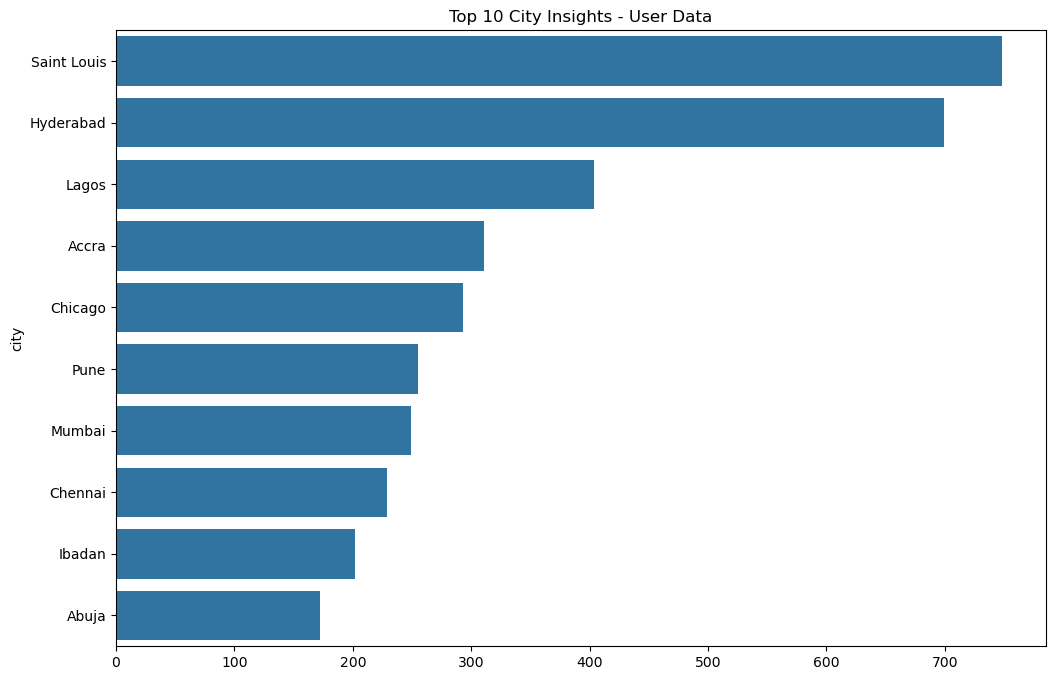

In [39]:
# City Distribution (Top 10 Cities)
plt.figure(figsize=(12, 8))
top_cities = user_data['city'].value_counts().nlargest(10)
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title('Top 10 City Insights - User Data')
plt.show()

## Top 10 States Distribution

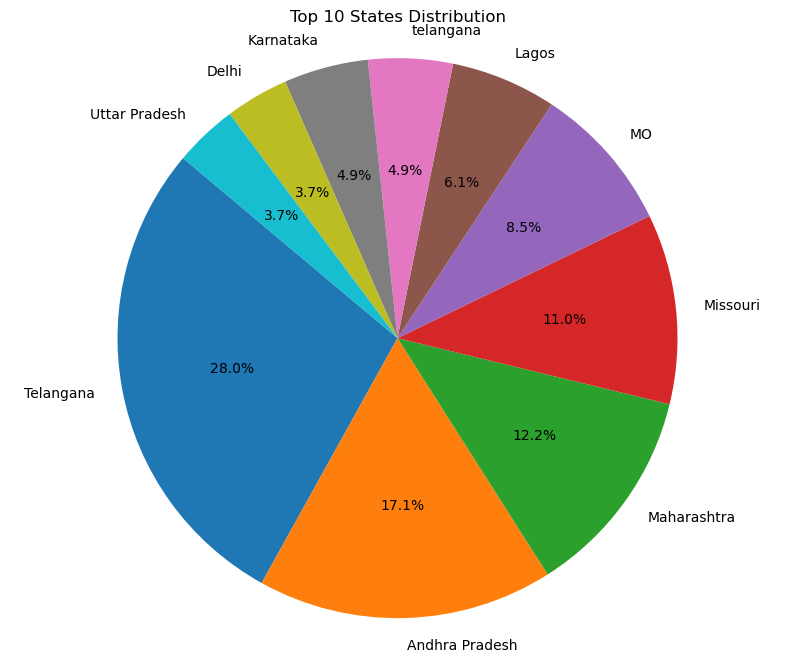

In [40]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'State' is the column name
top_states = opportunity_data['State'].value_counts().nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(top_states.values, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 States Distribution')
plt.axis('equal')  

plt.show()


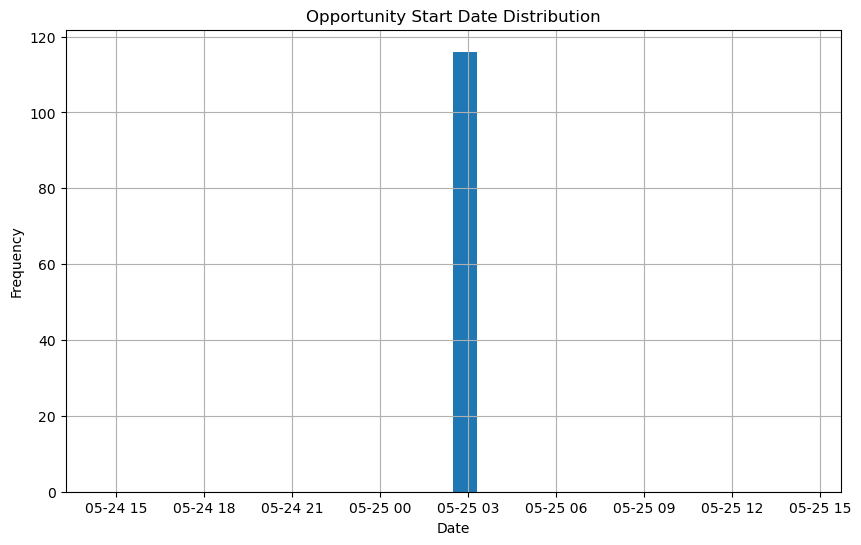

In [41]:
#  Opportunity Start Date Distribution (Histogram)
plt.figure(figsize=(10, 6))
opportunity_data['Opportunity Start Date'].hist(bins=30)
plt.title('Opportunity Start Date Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

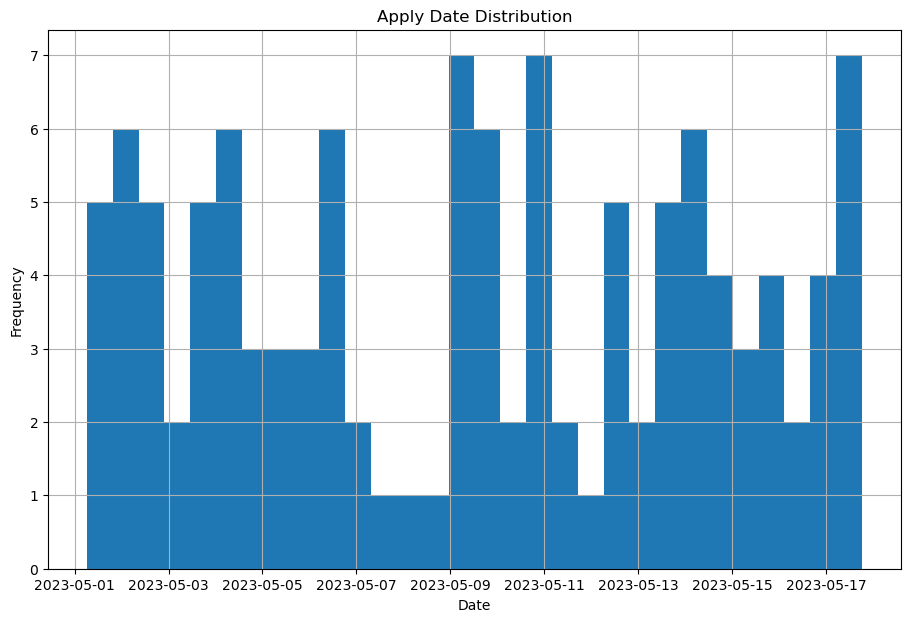

In [42]:
# Apply Date Distribution (Histogram)
plt.figure(figsize=(11,7))
opportunity_data['Apply Date'].hist(bins=30)
plt.title('Apply Date Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

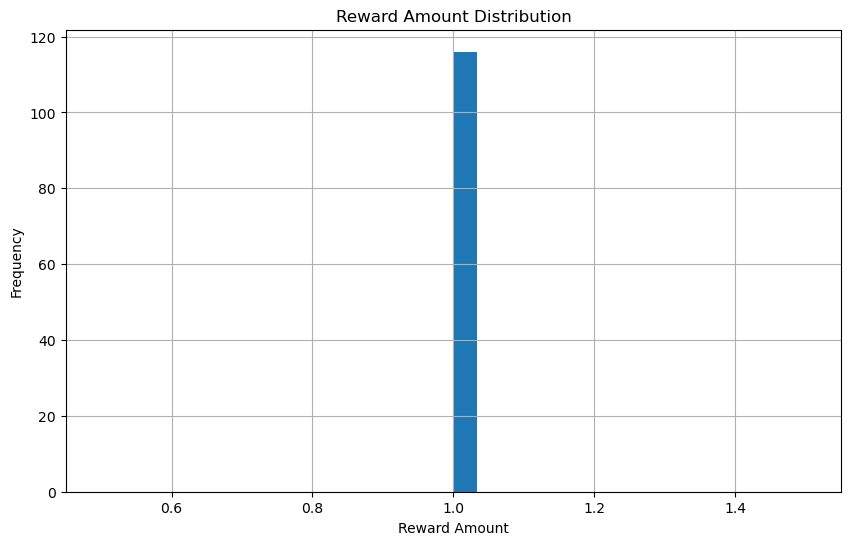

In [43]:
#Reward Amount Distribution (Histogram)
plt.figure(figsize=(10, 6))
opportunity_data['Reward Amount'].hist(bins=30)
plt.title('Reward Amount Distribution')
plt.xlabel('Reward Amount')
plt.ylabel('Frequency')
plt.show()

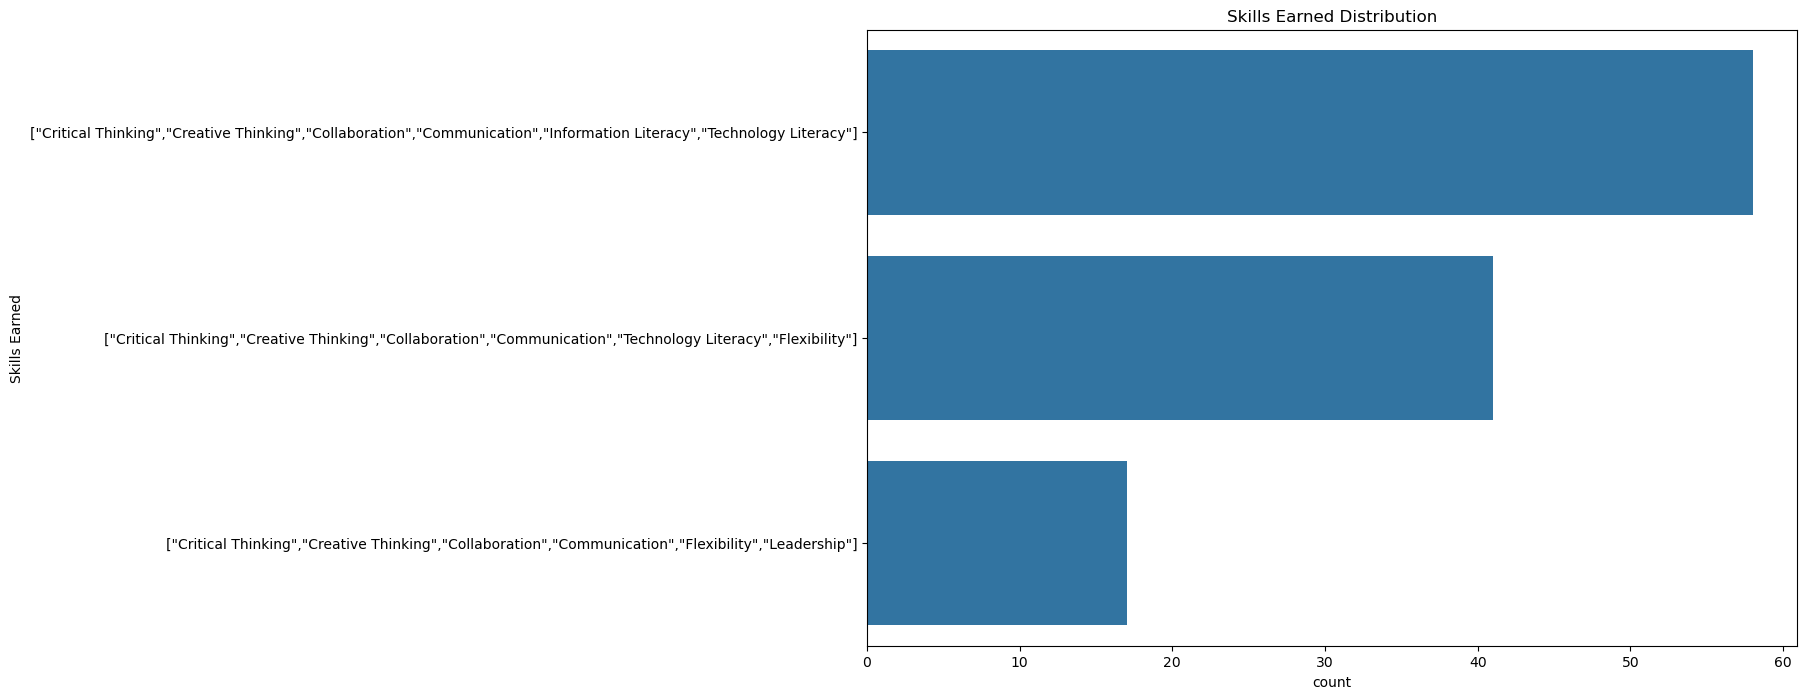

In [44]:
#  Skills Earned Count (Count Plot)
plt.figure(figsize=(12, 8))
sns.countplot(y='Skills Earned', data=opportunity_data, order=opportunity_data['Skills Earned'].value_counts().index)
plt.title('Skills Earned Distribution')
plt.show()

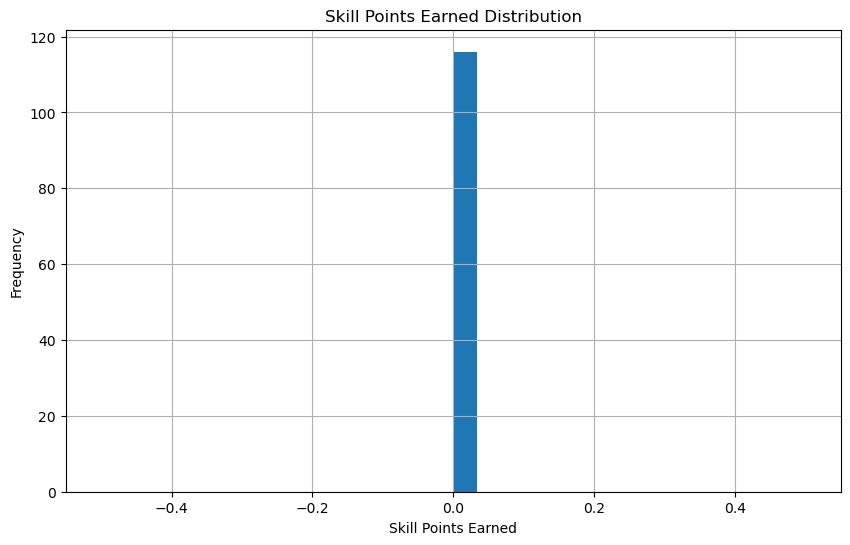

In [45]:
#  Skill Points Earned Distribution (Histogram)
plt.figure(figsize=(10, 6))
opportunity_data['Skill Points Earned'].hist(bins=30)
plt.title('Skill Points Earned Distribution')
plt.xlabel('Skill Points Earned')
plt.ylabel('Frequency')
plt.show()

### Student Status Distribution

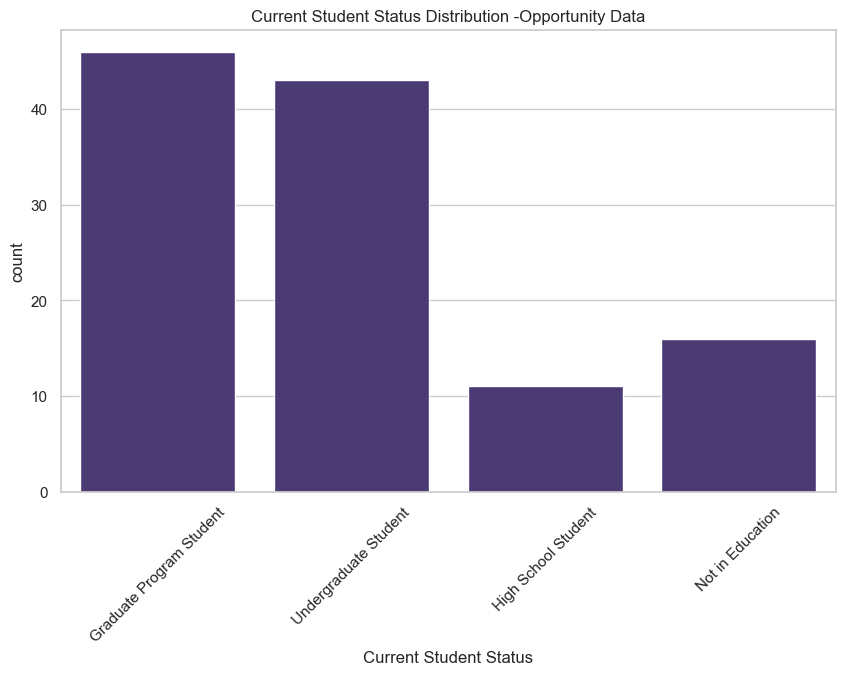

In [46]:
# Current Student Status Distribution (Count Plot)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="viridis")
sns.countplot(x='Current Student Status', data=opportunity_data)
plt.title('Current Student Status Distribution -Opportunity Data')
plt.xticks(rotation=45)
plt.show()

## Distribution of  Top 10 Majors - Opportunity Data

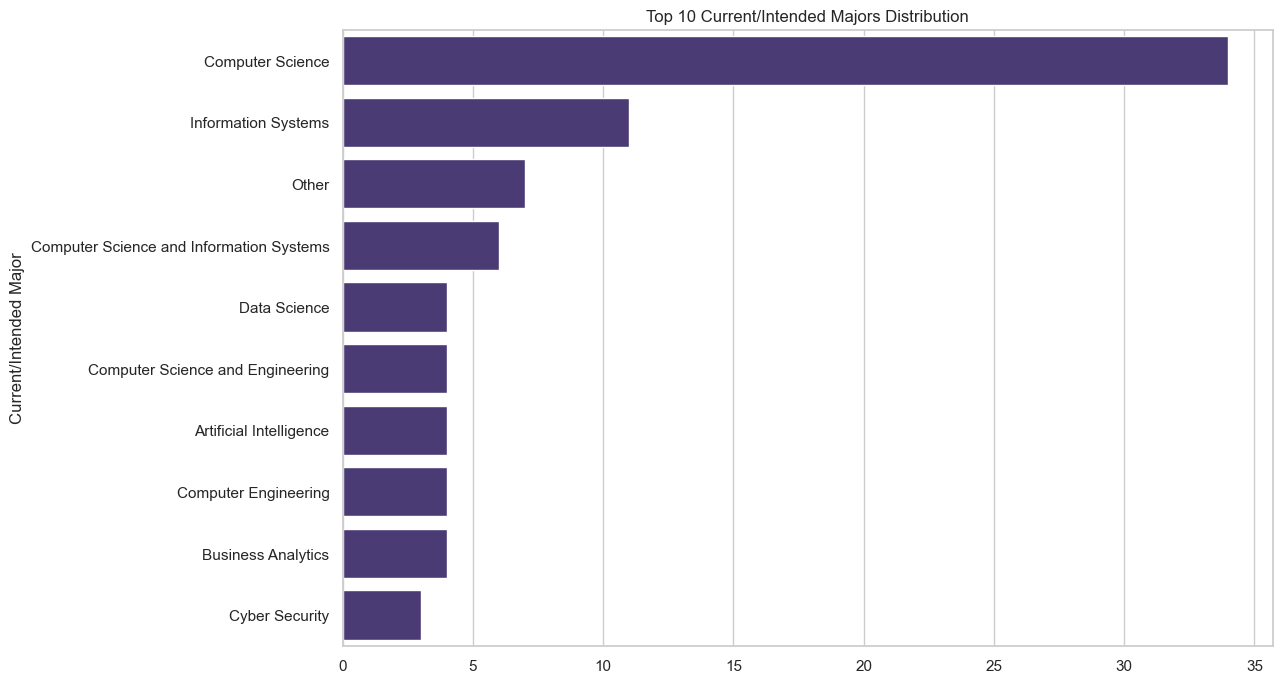

In [47]:
plt.figure(figsize=(12, 8))
top_majors = opportunity_data['Current/Intended Major'].value_counts().nlargest(10)
sns.barplot(y=top_majors.index, x=top_majors.values)
plt.title('Top 10 Current/Intended Majors Distribution')
plt.show()

### Global Reach Data

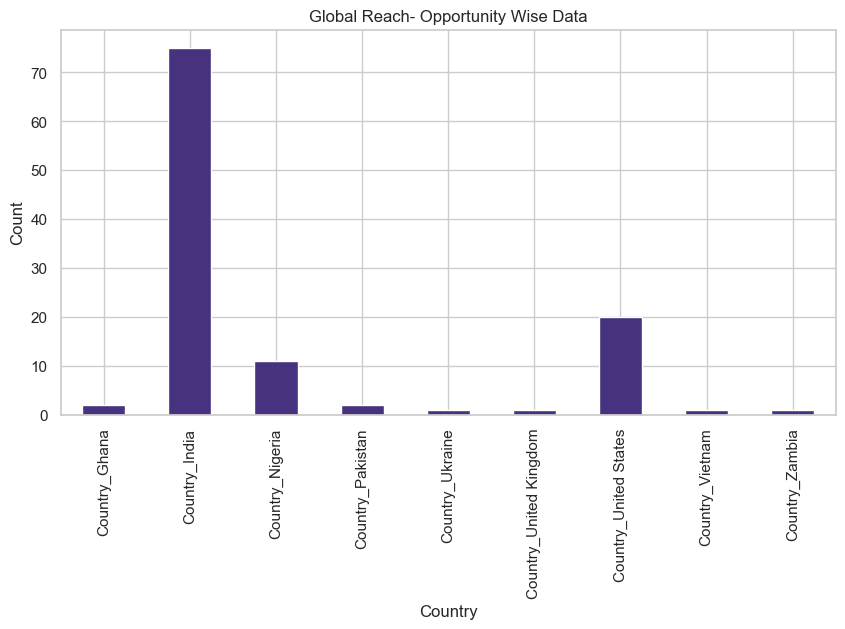

In [48]:
# Plot country distribution
country_counts = opportunity_data[['Country_Ghana', 'Country_India', 'Country_Nigeria',
       'Country_Pakistan', 'Country_Ukraine', 'Country_United Kingdom',
       'Country_United States', 'Country_Vietnam', 'Country_Zambia']].sum()
country_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Global Reach- Opportunity Wise Data')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=['Country_Ghana', 'Country_India', 'Country_Nigeria',
       'Country_Pakistan', 'Country_Ukraine', 'Country_United Kingdom',
       'Country_United States', 'Country_Vietnam', 'Country_Zambia'])
plt.show()

In [49]:
#save the preprocessed file


In [50]:
# Rename duplicate columns in opportunity_data
opportunity_data.columns = [f'opportunity_{col}' if col == 'Gender' or col == 'Country' else col for col in opportunity_data.columns]

# Rename duplicate columns in user_data
user_data.columns = [f'user_{col}' if col == 'Gender' or col == 'Country' else col for col in user_data.columns]


In [51]:
#2
# Check and print the column names to identify one-hot encoded country columns
print([col for col in opportunity_data.columns if 'Country' in col])
print([col for col in user_data.columns if 'Country' in col])

# Convert one-hot encoded country columns to a single 'opportunity_Country' column for opportunity_data
opportunity_country_columns = [col for col in opportunity_data.columns if 'Country_' in col]
if opportunity_country_columns:
    opportunity_data['opportunity_Country'] = opportunity_data[opportunity_country_columns].idxmax(axis=1).str.replace('Country_', '')
    # Drop the original one-hot encoded country columns
    opportunity_data.drop(columns=opportunity_country_columns, inplace=True)
else:
    print("No one-hot encoded country columns found in opportunity_data")

# Convert one-hot encoded country columns to a single 'user_Country' column for user_data
user_country_columns = [col for col in user_data.columns if 'Country_' in col]
if user_country_columns:
    user_data['user_Country'] = user_data[user_country_columns].idxmax(axis=1).str.replace('Country_', '')
    # Drop the original one-hot encoded country columns
    user_data.drop(columns=user_country_columns, inplace=True)
else:
    print("No one-hot encoded country columns found in user_data")

['Country_Ghana', 'Country_India', 'Country_Nigeria', 'Country_Pakistan', 'Country_Ukraine', 'Country_United Kingdom', 'Country_United States', 'Country_Vietnam', 'Country_Zambia']
['Country_Albania', 'Country_Algeria', 'Country_American Samoa', 'Country_Andorra', 'Country_Angola', 'Country_Aruba', 'Country_Australia', 'Country_Azerbaijan', 'Country_Bangladesh', 'Country_Belarus', 'Country_Belgium', 'Country_Belize', 'Country_Benin', 'Country_Bhutan', 'Country_Bosnia and Herzegovina', 'Country_Botswana', 'Country_Brazil', 'Country_British Indian Ocean Territory', 'Country_Burkina Faso', 'Country_Burundi', 'Country_Cambodia', 'Country_Cameroon', 'Country_Canada', 'Country_China', 'Country_Colombia', 'Country_Congo', 'Country_Congo, The Democratic Republic of the Congo', 'Country_Costa Rica', "Country_Cote d'Ivoire", 'Country_Cyprus', 'Country_Czech Republic', 'Country_Dominican Republic', 'Country_Ecuador', 'Country_Egypt', 'Country_Ethiopia', 'Country_Falkland Islands (Malvinas)', 'Cou

In [52]:
#3
# Convert one-hot encoded gender columns to a single 'user_Gender' column for user_data
user_gender_columns = [col for col in user_data.columns if 'Gender_' in col]
if user_gender_columns:
    user_data['user_Gender'] = user_data[user_gender_columns].idxmax(axis=1).str.replace('Gender_', '')
    # Drop the original one-hot encoded gender columns
    user_data.drop(columns=user_gender_columns, inplace=True)
else:
    print("No one-hot encoded gender columns found in user_data")


In [53]:
#4
# Extract additional information from the opportunity data
opportunity_data['Completion Status'] = opportunity_data['Opportunity End Date'].notnull()
completed_opportunities = opportunity_data[opportunity_data['Completion Status']]

# Aggregate data for analysis
popular_opportunities_signup = opportunity_data['Opportunity Name'].value_counts().reset_index()
popular_opportunities_signup.columns = ['Opportunity Name', 'Sign-Ups']

popular_opportunities_completed = completed_opportunities['Opportunity Name'].value_counts().reset_index()
popular_opportunities_completed.columns = ['Opportunity Name', 'Completions']

total_scholarship = opportunity_data.groupby('Opportunity Name')['Reward Amount'].sum().reset_index()
total_scholarship.columns = ['Opportunity Name', 'Total Scholarship']


In [54]:
#5 Check for the presence of 'Current Student Status' and handle missing column
if 'Current Student Status' in user_data.columns:
    demographics_student_status = user_data['Current Student Status'].value_counts().reset_index()
    demographics_student_status.columns = ['Current Student Status', 'Count']
else:
    demographics_student_status = pd.DataFrame(columns=['Current Student Status', 'Count'])

# Aggregate user data for demographic analysis
demographics_gender = user_data['user_Gender'].value_counts().reset_index()
demographics_gender.columns = ['Gender', 'Count']


In [57]:
# Standardize city names to lowercase
user_data['city'] = user_data['city'].str.lower()

# Define a mapping of variations to a single standard name
city_mapping = {
    'saint louis': 'saint louis',
    'st louis': 'saint louis',
    'saintlouis': 'saint louis',
    # Add more variations as needed
}

# Apply the mapping to replace variations with standard names
user_data['city'] = user_data['city'].replace(city_mapping)

# To combine values, we need to aggregate the data.
# Example: Count the number of records per city
city_counts = user_data.groupby('city').size().reset_index(name='count')

# If you have numerical columns that you need to sum, use:
# city_sums = user_data.groupby('city').sum().reset_index()

# Save the cleaned and aggregated data
user_data.to_csv('cleaned_user_data.csv', index=False, encoding='utf-8')
city_counts.to_csv('city_counts.csv', index=False, encoding='utf-8')

# Verify the results
print(user_data['city'].unique())
print(city_counts)

['owerri' 'kottayam' 'kumasi' ... 'siddharthnagar' 'kadapa distrit'
 'new lenox']
                    city  count
0                      a      3
1                    aba     21
2     abaji area council      1
3                   abak      2
4              abakaliki      6
...                  ...    ...
3679              zhuhai      3
3680          zionswille      1
3681            zirakpur      1
3682             zouhour      1
3683                zuru      4

[3684 rows x 2 columns]
